<a href="https://colab.research.google.com/github/FGalvao77/XG-Boost-Vs-Light-GBM-Vs-Multi-layer-Perceptron/blob/main/XG_Boost_Vs_Light_GBM_Vs_Multi_layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **`XG Boost` Vs `Light GBM` Vs `Multi-layer Perceptron`**
---
---

<br>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mat
# import seaborn as sns
import yellowbrick as ye
import xgboost as xgb
import lightgbm as lgb

In [ ]:
print(
    'Libraries version',
    '===================\n'
    f'Pandas: {pd.__version__}',
    f'NumPy: {np.__version__}',
    f'Scikit-learn: {sk.__version__}',
    f'Matplotlib: {mat.__version__}',
    # f'Seaborn: {sns.__version__}',
    f'Yellowbrick: {ye.__version__}',
    f'XG Boost: {xgb.__version__}',
    f'Light GBM: {lgb.__version__}',
    sep='\n'
)

Libraries version
Pandas: 1.3.5
NumPy: 1.21.6
Scikit-learn: 1.0.2
Matplotlib: 3.2.2
Yellowbrick: 1.4
XG Boost: 0.90
Light GBM: 2.2.3


In [ ]:
from sklearn.datasets import make_classification

data_X, data_y = make_classification(
    n_samples=15_000,
    n_features=15,
    n_informative=5,
    n_redundant=5,
    random_state=1527
)

print(data_X.shape, data_y.shape)

(15000, 15) (15000,)


In [ ]:
from string import ascii_uppercase as alphabetical_list

In [ ]:
cols_names = list(alphabetical_list)
feature_names = cols_names[0: data_X.shape[1]]

In [ ]:
database = pd.DataFrame(data_X, columns=feature_names)
database['target'] = data_y

In [ ]:
database.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,target
0,-0.870206,-1.233331,-0.877305,-0.686119,0.318404,0.365200,1.288360,1.367723,2.053065,0.315178,0.684242,-2.206563,1.304892,-0.558898,0.199531,1
1,-2.010105,-0.216364,-3.864619,0.698795,2.764919,-1.585162,-3.539613,-3.188798,2.282611,3.381695,0.915096,1.475961,0.619021,5.935623,2.332954,0
2,0.276256,-0.976197,-0.462371,0.571088,1.754053,-0.078550,0.415589,-0.975499,2.391238,1.262320,0.044790,-2.249064,1.250083,-0.336123,1.054880,0
3,-1.177026,-2.480247,-0.149277,-0.680933,-1.404642,1.358752,0.886850,1.920499,0.688483,-0.780146,0.162496,-0.826720,1.301891,-0.084775,-0.838616,0
4,-0.453637,-0.906547,0.343664,0.195630,-0.277497,-1.907377,-0.583024,-0.411091,-0.179143,-0.346821,-0.776414,0.631304,0.156917,0.370700,0.039985,0


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       15000 non-null  float64
 1   B       15000 non-null  float64
 2   C       15000 non-null  float64
 3   D       15000 non-null  float64
 4   E       15000 non-null  float64
 5   F       15000 non-null  float64
 6   G       15000 non-null  float64
 7   H       15000 non-null  float64
 8   I       15000 non-null  float64
 9   J       15000 non-null  float64
 10  K       15000 non-null  float64
 11  L       15000 non-null  float64
 12  M       15000 non-null  float64
 13  N       15000 non-null  float64
 14  O       15000 non-null  float64
 15  target  15000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 1.8 MB


In [ ]:
# database = pd.DataFrame(axis_X, columns=('a b c d e f g h i j k l m n o').split())
# database['target'] = axis_y
# database.head()

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline 
plt.style.use('ggplot')

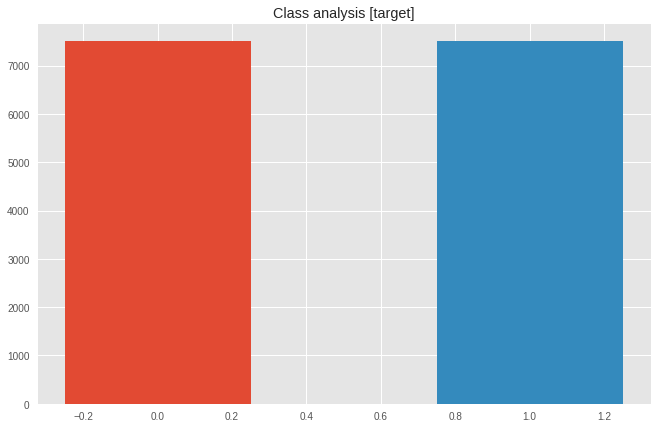

In [ ]:
from yellowbrick.target import ClassBalance

plt.figure(figsize=(11, 7))
viz = ClassBalance(labels=[0, 1])

viz.fit(data_y)
plt.title('Class analysis [target]')
plt.show();

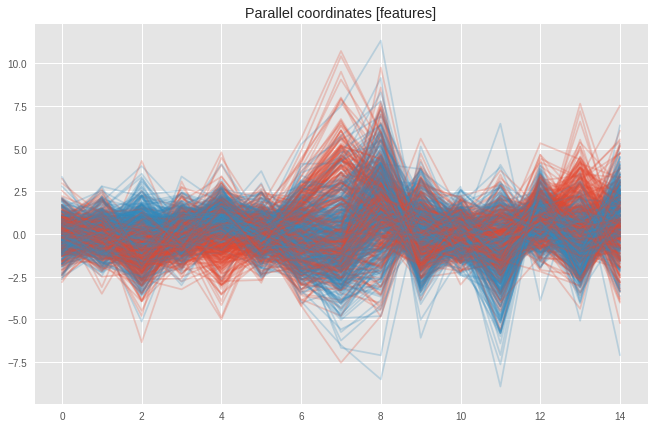

In [ ]:
from yellowbrick.features import ParallelCoordinates

plt.figure(figsize=(11, 7))
feats = feature_names
classes = [0, 1]
viz = ParallelCoordinates(classes=classes, features=feats, sample=0.05, shuffle=True)

viz.fit_transform(data_X, data_y)
plt.title('Parallel coordinates [features]')
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split as tts 

In [ ]:
Xtrain, Xtest, yTrain, yTest = tts(data_X, data_y, test_size=0.5, random_state=1527)

print(f'training data: {Xtrain.shape[0]} samples | test data: {Xtest.shape[0]} samples')

training data: 7500 samples | test data: 7500 samples


<br>

#### **XG Boost**

In [ ]:
from xgboost import XGBClassifier as xgbclass

In [ ]:
mdl_XGB = xgbclass(
    n_estimators=1_500, learning_rate=0.95, max_depth=5, min_child_weight=2, 
    gamma=1, subsample=0.85, colsample_bytree=0.85, random_state=1527, n_jobs=-1
)

mdl_XGB.fit(Xtrain, yTrain)

XGBClassifier(colsample_bytree=0.85, gamma=1, learning_rate=0.95, max_depth=5,
              min_child_weight=2, n_estimators=1500, n_jobs=-1,
              random_state=1527, subsample=0.85)

In [ ]:
preds_XGB = mdl_XGB.predict(Xtest)
preds_XGB[:20]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

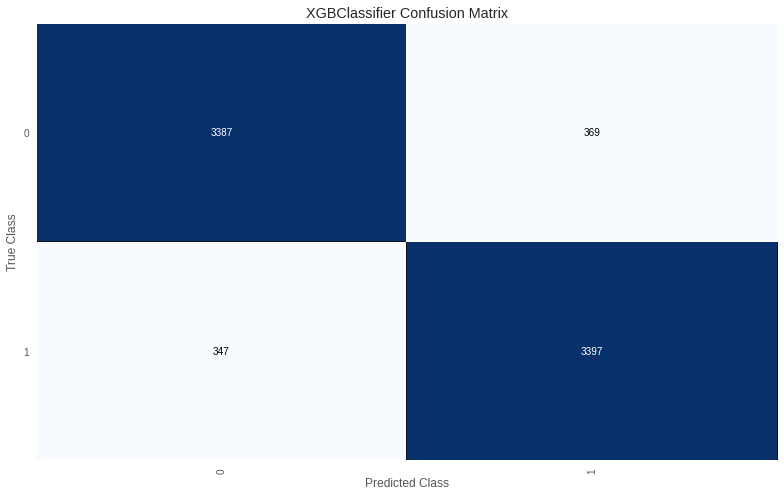

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize=(11, 7))
conf_mat = ConfusionMatrix(mdl_XGB,  classes=[0, 1], cmap='Blues')

conf_mat.fit(Xtrain, yTrain)
conf_mat.score(Xtest, yTest)
conf_mat.show();

In [ ]:
from sklearn.metrics import classification_report

print(f'Classification report:\n {classification_report(yTest, preds_XGB)}')

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      3756
           1       0.90      0.91      0.90      3744

    accuracy                           0.90      7500
   macro avg       0.90      0.90      0.90      7500
weighted avg       0.90      0.90      0.90      7500



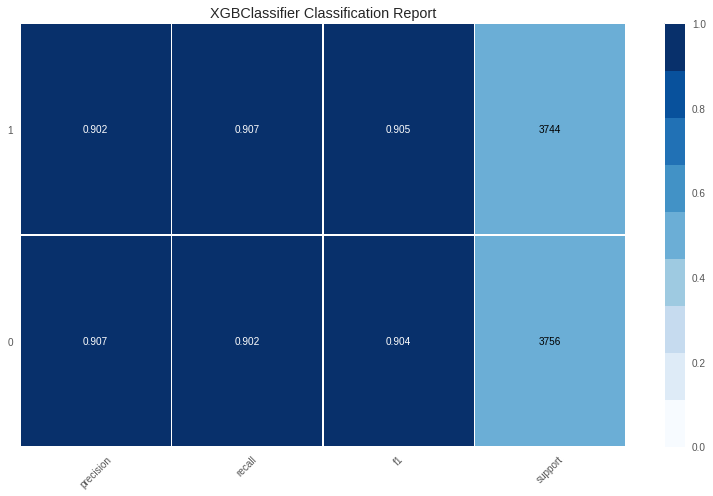

In [ ]:
from yellowbrick.classifier import ClassificationReport

plt.figure(figsize=(11, 7))
class_report = ClassificationReport(
    mdl_XGB, classes=[0, 1], support=True, cmap='Blues')

class_report.fit(Xtrain, yTrain)
class_report.score(Xtest, yTest)
class_report.show();

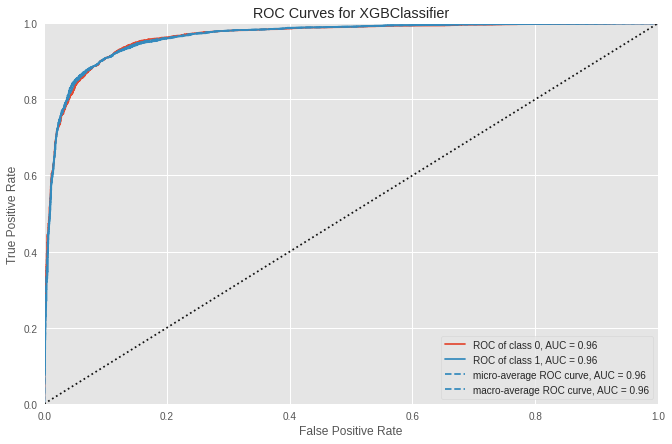

In [ ]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(11, 7))
curve_ROC = ROCAUC(mdl_XGB, classes=[0, 1])

curve_ROC.fit(Xtrain, yTrain)
curve_ROC.score(Xtest, yTest)
curve_ROC.show();

In [ ]:
from sklearn.model_selection import cross_val_score as cvs, RepeatedStratifiedKFold
from xgboost import XGBClassifier as xgbclass

In [ ]:
mdl_XGB_v2 = xgbclass()

cross_val = RepeatedStratifiedKFold(
    n_splits=15, n_repeats=5, random_state=1527
)

score_result = cvs(
    estimator=mdl_XGB_v2, X=data_X, y=data_y, 
    scoring='accuracy', cv=cross_val, n_jobs=-1
)

print(f'average accuracy [scores]: {np.mean(score_result)}')

average accuracy [scores]: 0.90088


<br>

#### **Light GBM**

In [ ]:
from lightgbm import LGBMClassifier as lgbclass

In [ ]:
mdl_LGB = lgbclass(
    n_estimators=1_500, learning_rate=0.95, max_depth=5, min_child_weight=2,
    subsample=0.85, colsample_bytree=0.85, random_state=15727, n_jobs=-1
)

mdl_LGB.fit(Xtrain, yTrain)

LGBMClassifier(colsample_bytree=0.85, learning_rate=0.95, max_depth=5,
               min_child_weight=2, n_estimators=1500, random_state=15727,
               subsample=0.85)

In [ ]:
preds_LGB = mdl_LGB.predict(Xtest)
preds_LGB[:20]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

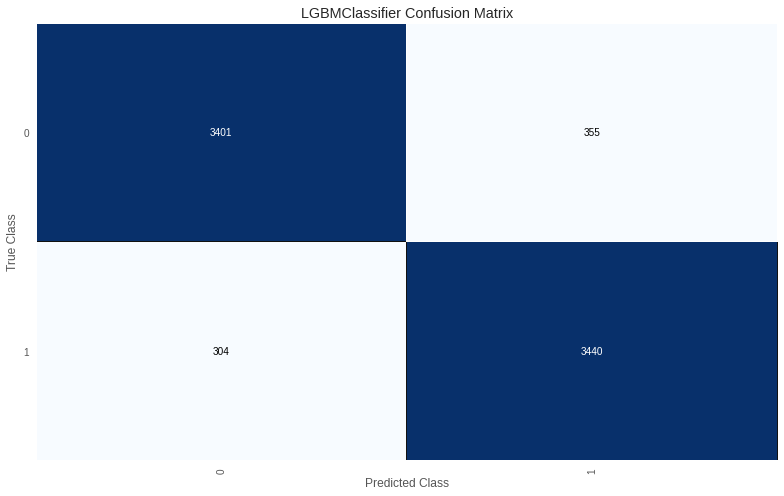

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize=(11, 7))
conf_mat = ConfusionMatrix(mdl_LGB, classes=[0, 1], cmap='Blues')

conf_mat.fit(Xtrain, yTrain)
conf_mat.score(Xtest, yTest)
conf_mat.show();

In [ ]:
from sklearn.metrics import classification_report

print(f'Classification report:\n {classification_report(yTest, preds_LGB)}')

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      3756
           1       0.91      0.92      0.91      3744

    accuracy                           0.91      7500
   macro avg       0.91      0.91      0.91      7500
weighted avg       0.91      0.91      0.91      7500



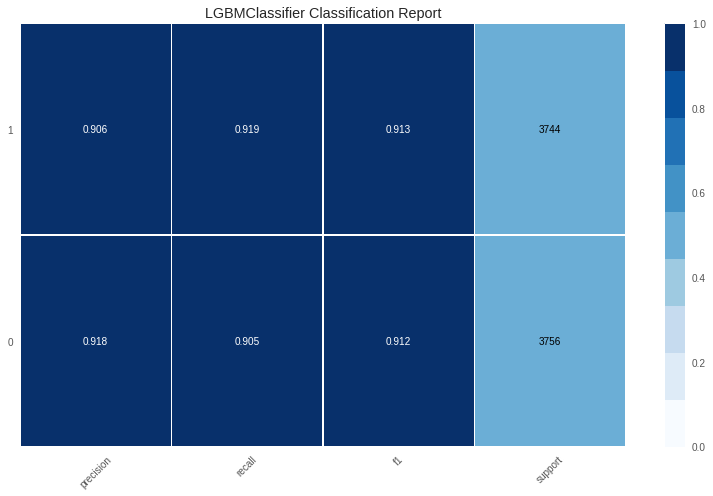

In [ ]:
from yellowbrick.classifier import ClassificationReport

plt.figure(figsize=(11, 7))
class_report = ClassificationReport(
    mdl_LGB, classes=[0, 1], support=True, cmap='Blues')

class_report.fit(Xtrain, yTrain)
class_report.score(Xtest, yTest)
class_report.show();

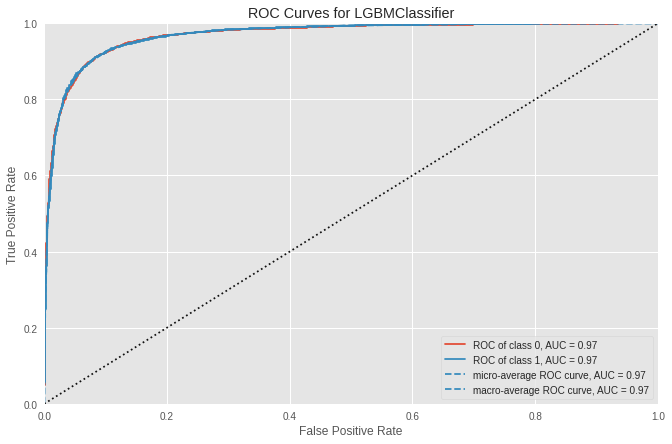

In [ ]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(11, 7))
curve_ROC = ROCAUC(mdl_LGB, classes=[0, 1])

curve_ROC.fit(Xtrain, yTrain)
curve_ROC.score(Xtest, yTest)
curve_ROC.show();

In [ ]:
from sklearn.model_selection import cross_val_score as cvs, RepeatedStratifiedKFold
from lightgbm import LGBMClassifier as lgbclass

In [ ]:
mdl_LGB_v2 = lgbclass()

cross_val = RepeatedStratifiedKFold(
    n_splits=15, n_repeats=5, random_state=1527
)

score_result = cvs(
    estimator=mdl_LGB_v2, X=data_X, y=data_y, 
    scoring='accuracy', cv=cross_val, n_jobs=-1
)

print(f'average accuracy [scores]: {np.mean(score_result)}')

average accuracy [scores]: 0.9304266666666666


<br>

#### **RNA - MLP [multi-layer percepton]**

In [ ]:
from sklearn.neural_network import MLPClassifier as mlp

In [ ]:
mdl_MLP = mlp(
    activation='logistic', learning_rate='adaptive', max_iter=2_000, random_state=1527
)

mdl_MLP.fit(Xtrain, yTrain)

MLPClassifier(activation='logistic', learning_rate='adaptive', max_iter=2000,
              random_state=1527)

In [ ]:
preds_MLP = mdl_LGB.predict(Xtest)
preds_MLP[:20]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

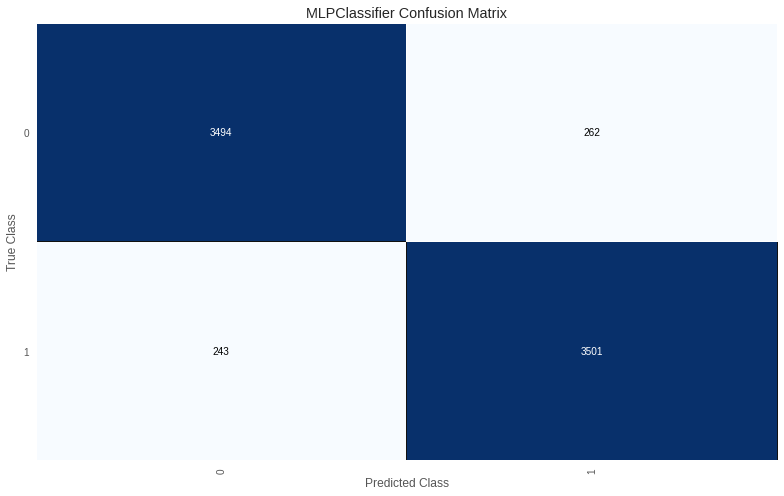

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize=(11, 7))
conf_mat = ConfusionMatrix(mdl_MLP, classes=[0, 1], cmap='Blues')

conf_mat.fit(Xtrain, yTrain)
conf_mat.score(Xtest, yTest)
conf_mat.show();

In [ ]:
from sklearn.metrics import classification_report

print(f'Classification report:\n {classification_report(yTest, preds_MLP)}')

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      3756
           1       0.91      0.92      0.91      3744

    accuracy                           0.91      7500
   macro avg       0.91      0.91      0.91      7500
weighted avg       0.91      0.91      0.91      7500



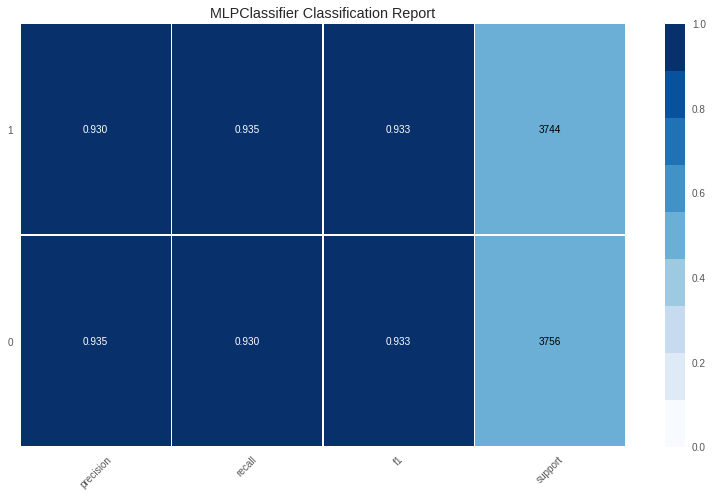

In [ ]:
from yellowbrick.classifier import ClassificationReport

plt.figure(figsize=(11, 7))
class_report = ClassificationReport(
    mdl_MLP, classes=[0, 1], support=True, cmap='Blues')

class_report.fit(Xtrain, yTrain)
class_report.score(Xtest, yTest)
class_report.show();

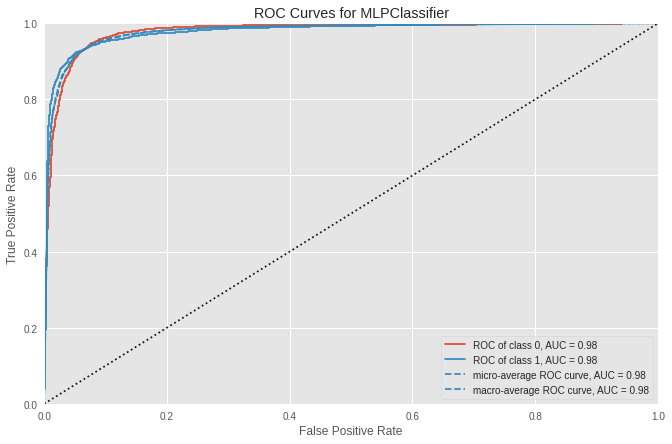

In [ ]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(11, 7))
curve_ROC = ROCAUC(mdl_MLP, classes=[0, 1])

curve_ROC.fit(Xtrain, yTrain)
curve_ROC.score(Xtest, yTest)
curve_ROC.show();

In [ ]:
from sklearn.model_selection import cross_val_score as cvs, RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier as mlp

In [ ]:
mdl_MLP_v2 = mlp()

cross_val = RepeatedStratifiedKFold(
    n_splits=15, n_repeats=5, random_state=1527
)

score_result = cvs(
    estimator=mdl_MLP_v2, X=data_X, y=data_y, 
    scoring='accuracy', cv=cross_val, n_jobs=-1
)

print(f'average accuracy [scores]: {np.mean(score_result)}')

average accuracy [scores]: 0.9507466666666666
